<a href="https://colab.research.google.com/github/DarkDk123/Dog-Breed-Classification/blob/main/Dog-Breed-Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐶 Dog Breeds Classification Using Tensorflow

Have you ever seen a dog and wondered what breed it is?

I have. And then someone says, *"it's a BullDog"* and you think, how did they know that?


<img width=30% src="https://media1.tenor.com/m/InjqAJQgZngAAAAd/star-wars-get-ready-for-battle-boys.gif">

In this project we're going to be using machine learning to help us identify different breeds of dogs.

To do this, we'll be using data from the [Kaggle dog breed identification competition](https://www.kaggle.com/c/dog-breed-identification/overview). It consists of a collection of **10,000+ labelled images** of **120 different dog breeds.**

This kind of problem is called **multi-class image classification**. It's multi-class because we're trying to classify mutliple different breeds of dog.

Multi-class image classification is an important problem because it's the same kind of technology Tesla uses in their self-driving cars or Airbnb uses in automatically adding information to their listings.

Since the most important step in a deep learning problem is **getting the data ready** *(turning it into numbers)*, that's what we're going to start with.

---
### **We're going to go through the following TensorFlow/Deep Learning workflow:** 🚀

#### **1. Problem Definition**

We need to identify a Dog's breed based on it's image, classifying a dog into almost 120 different classes of breeds.

#### **2. Get data ready for Training**

- **A. Downloading and storing data (download from Kaggle, store, import):**\
- **B. Prepare the data *(preprocessing, the 3 sets i.e. train, test, validation And  Separating X & y).***

#### **3. Choose and fit/train a model.**

Based on the type of problem, either using a pretrained (TensorFlow Hub or other) model, or training one from scratch.\
([TensorFlow Hub](https://www.tensorflow.org/hub), `tf.keras.applications`, [TensorBoard](https://www.tensorflow.org/tensorboard), [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping))

#### **4. Evaluating a model.**

Making predictions on **validation set**, comparing them with the ground truth labels, and according moving further.

#### **5. Improve the model through experimentation.**

Start with few 1000 images, make sure it works then increase the number of images accordingly.

#### **6. Save, sharing and reloading your model**
Saving the model once **reasonable results** are achieved.

---

### Getting our workspace ready

Before we get started, since we'll be using **TensorFlow 2.x** and **TensorFlow Hub (TensorFlow Hub)**. So make sure all the packages are installed as in [`requirements.txt`](./requirements.txt).

As we'll require a **GPU** for this intensive training, please use a **GPU** or Google Colab for free resources.\
All of the packages come pre-installed with it.


Now, let's start by downloading the data.

### **Getting data ready for Training**

##### **Downloading & Storing the data.**

Since much of machine learning is getting your data ready to be used with a machine learning model, we'll take extra care getting it setup.

There are a few ways we could do this. Many of them are detailed in the [Google Colab notebook on I/O (input and output)](https://colab.research.google.com/notebooks/io.ipynb).

And because the data we're using is hosted on Kaggle, we could even use the [Kaggle API](https://www.kaggle.com/docs/api).

This is great but what if the data you want to use wasn't on Kaggle?

**[Optional for colab]**\
One method is to **upload it to your Google Drive**, mount your drive in this notebook and import the file.

In [1]:
# Running this cell will provide you with a token to link your drive to this notebook
from google.colab import drive

# drive.mount("/content/drive")

Following the prompts from the cell above, if everything worked, you should see a "drive" folder available under the Files tab.

This means we'll be able to access files in our Google Drive right in this notebook.

For this project, I've [downloaded the data from Kaggle](https://www.kaggle.com/c/dog-breed-identification/data) and uploaded it to my Google Drive as a .zip file under the folder "Data".

Or alternatively you can use Kaggle API ***(token required!)***

```python
mv "kaggle.json" "/root/.kaggle/" # move kaggle key to path

kaggle competitions download -c dog-breed-identification # download using API
```

Finally, to access it, we'll have to unzip it.\
***(Or unzip it locally)***

```python
# Use the '-d' parameter as the destination for where the files should go
!unzip "drive/My Drive/Data/dog-breed-identification.zip" -d "drive/My Drive/Data/"
```

*Note: Paths can differ.*

Now All of our data should be in `/data` folder.


---

Before going further on exploring & preprocessing data.

Let's rerun some import statements. And check whether or not we're using a ***GPU***.

In [2]:
# Importing tensorflow & tf_hub
import tensorflow as tf
import tensorflow_hub as tfhub
import tf_keras as keras

print("TF version:", tf.__version__)
print("Hub version:", tfhub.__version__)

# Check for GPU
print("GPU", "available (Oh Yeahhh!!!!)" if tf.config.list_physical_devices("GPU") else "not available ;(")

TF version: 2.17.1
Hub version: 0.16.1
GPU available (Oh Yeahhh!!!!)


##### **Accessing & Exploring the Data**

Now the data files we're working with are available, we can explore it now!

Let's start with `labels.csv` which contains all of the image ID's and their assosciated dog breed (our data and labels).

In [3]:
# Change working directory to our project in Drive.
%cd /content/drive/MyDrive/Dog-Vision/

# Pandas to read this
import pandas as pd

# Read in the labels csv file
labels_csv = pd.read_csv("./data/labels.csv")

labels_csv.head() # Explore more in colab's interactive table (or use MS data wrangler)

/content/drive/MyDrive/Dog-Vision


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [4]:
print("Number of images:", len(labels_csv))

# Descriptive statistics
labels_csv.describe()

Number of images: 10222


,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


By this, we can see there are ***10222*** different ID's (meaning 10222 different images) and ***120 different breeds***.

Let's count how many images there are of each breed. Or which breed has the dominance here & which not...

In [5]:
# Value counts
labels_csv["breed"].value_counts()

,count
breed,
scottish_deerhound,126
maltese_dog,117
afghan_hound,116
entlebucher,115
bernese_mountain_dog,114
...,...
golden_retriever,67
brabancon_griffon,67
komondor,67


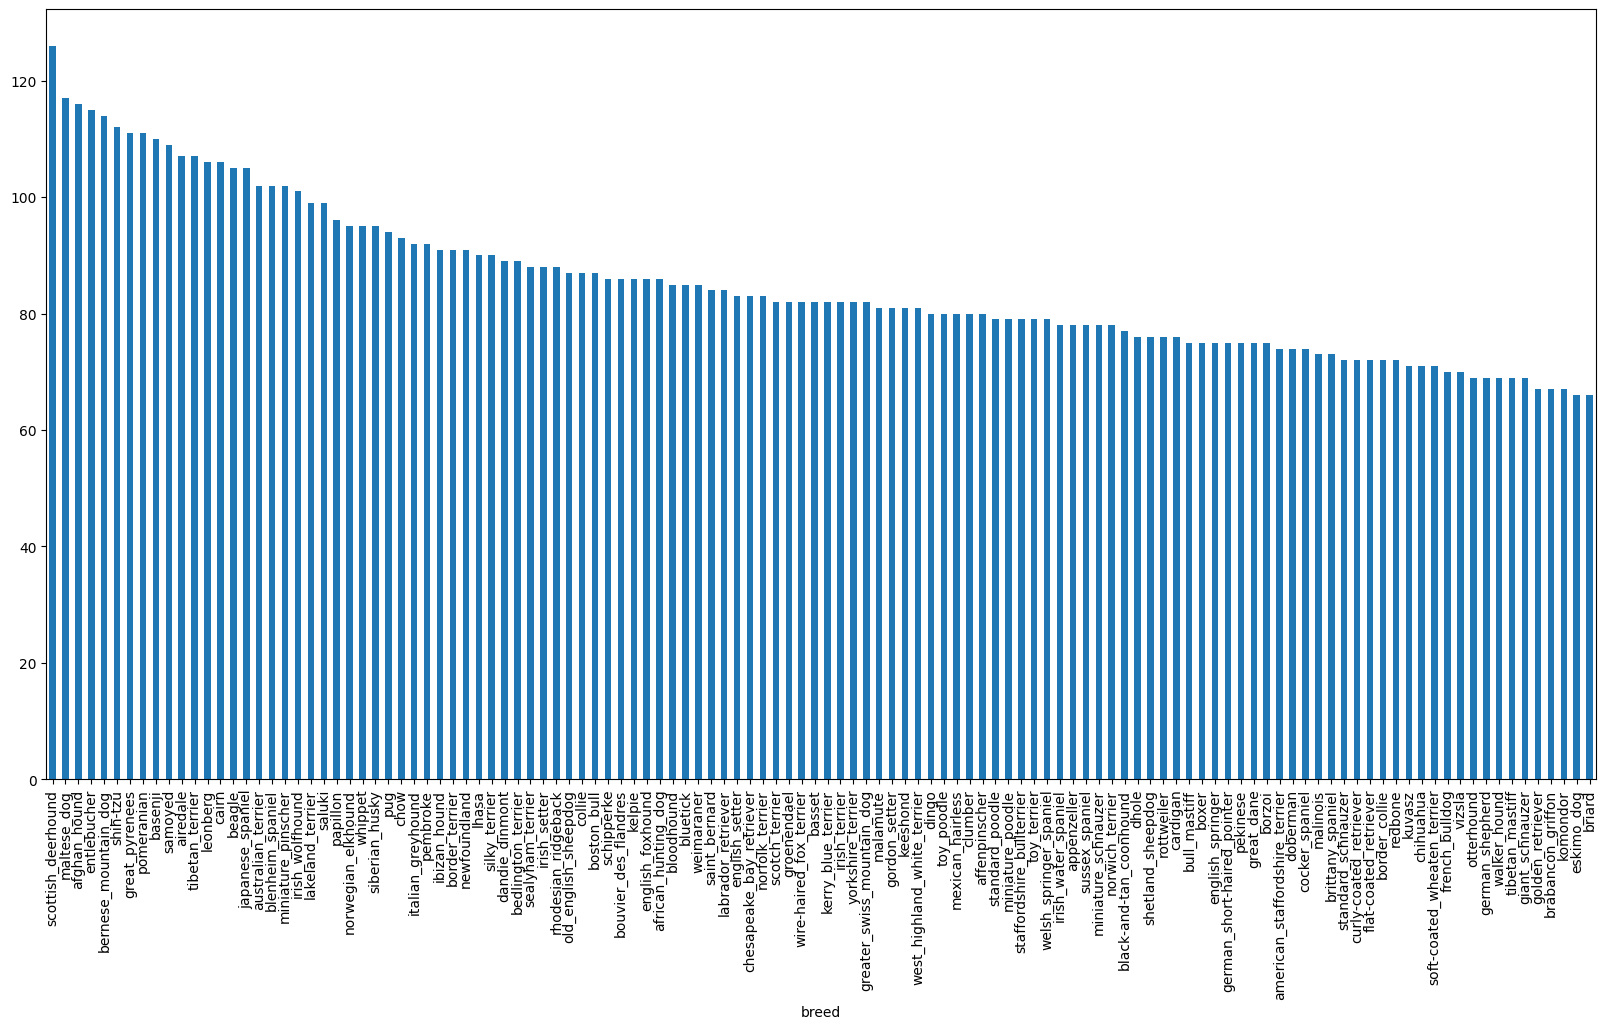

In [6]:
# Let's plot on a bar plot

labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10));

In [7]:
# Average no. of training images per breed.
labels_csv.breed.value_counts().mean()

85.18333333333334

Great!! we can see there's about **60-70+** images for each dog breed. On average we've **85 images** for each breed

This is a good amount as for some of their vision products [Google recommends a minimum of 10 images per class to get started](https://cloud.google.com/vision/automl/object-detection/docs/prepare).

And as we know, the more training data (images here), the more model has to figure out patterns between them.

Let's see one of the beautiful dog images.

It may take some time. (lots of images)

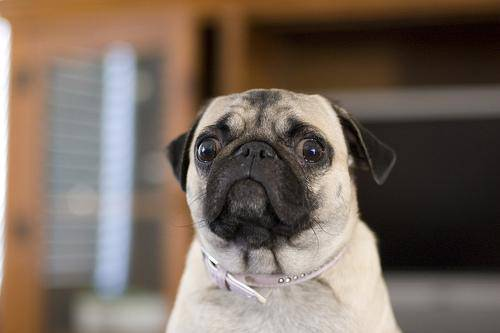

In [8]:
# Look "vodafon wala kutta!"
from IPython.display import display, Image
Image("./data/train/f6575543e0456836d1fc6871e586a6e0.jpg")

##### **Getting images and their labels**

Since we've got the image ID's and their labels in a DataFrame (`labels_csv`), we'll use it to create:
* A list a filepaths to training images (absolute paths)
* An array of all labels
* An array of all unique labels

We'll only create a list of **filepaths to images** rather than importing them all to begin with. This is because working with filepaths (strings) is much efficient than working with images.

In [9]:
# Let's create a series of filepaths to corresponding images.
# Working with absolute paths.

pd.set_option('max_colwidth', 400) # Increase column width

file_paths = "/content/drive/MyDrive/Dog-Vision/train/" + labels_csv['id'] + ".jpg"

file_paths.head() # Wonderful

,id
0,/content/drive/MyDrive/Dog-Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg
1,/content/drive/MyDrive/Dog-Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg
2,/content/drive/MyDrive/Dog-Vision/train/001cdf01b096e06d78e9e5112d419397.jpg
3,/content/drive/MyDrive/Dog-Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg
4,/content/drive/MyDrive/Dog-Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg


Now that we've got a Series of all the *filepaths* from the ID column of `labels_csv`, we should verify it with our corresponding **training data images**

They should be equal, if not, then we've done something wrong while unzipping our data.

Let's see -

In [10]:
# Number of filepaths matches number of actual image files or not?!

import os
if (_tot:=len(os.listdir("./data/train"))) == len(file_paths):
  print(f"Filenames match actual amount of files!, Total files are: {_tot}")
else:
  print("Filenames do not match actual amount of files, check the target directory.")

Filenames match actual amount of files!, Total files are: 10222


DOG Breed: scottish_deerhound


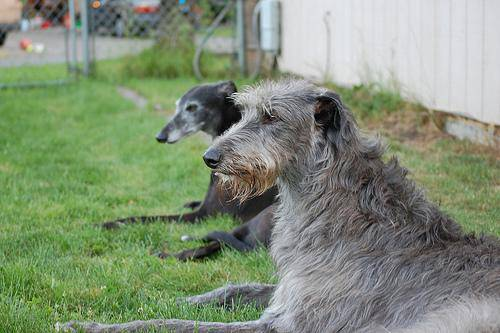

In [11]:
# Let's check a random Dog from filepaths.

_rimg = file_paths.sample(1)

print("DOG Breed:", labels_csv.loc[_rimg.index, "breed"].values[0])
Image(_rimg.values[0])

Woah! Cute Dog!! ❤️‍🔥

Now we've got our **image filepaths** together, let's get the labels.

Now lets do the same thing as before, compare the amount of labels to number of filenames.

##### **Conveting label data into numbers (NumPy Arrays)**

We'll take them from `labels_csv` and turn them into a NumPy array.

NumPy array's are fast & efficient for further preprocessing!!

We'll also find all of the unique dog breed names.

In [12]:
# Checking all images matches number of lables or not!

if len(labels_csv['id']) == len(file_paths):
  print("Number of labels matches number of filenames!")
else:
  print("Number of labels does not match number of filenames, check data directories.")

Number of labels matches number of filenames!


In [13]:
labels = labels_csv["breed"].to_numpy()
unique_breeds = labels_csv["breed"].unique()

# look, labels as np array
print(labels[:10], "...Many more")

# Let's see unique labels
print("\n\nTotal unique breeds", len(unique_breeds),"\n\nUnique breed labels:", unique_breeds)

['boston_bull' 'dingo' 'pekinese' 'bluetick' 'golden_retriever'
 'bedlington_terrier' 'bedlington_terrier' 'borzoi' 'basenji'
 'scottish_deerhound'] ...Many more


Total unique breeds 120 

Unique breed labels: ['boston_bull' 'dingo' 'pekinese' 'bluetick' 'golden_retriever'
 'bedlington_terrier' 'borzoi' 'basenji' 'scottish_deerhound'
 'shetland_sheepdog' 'walker_hound' 'maltese_dog' 'norfolk_terrier'
 'african_hunting_dog' 'wire-haired_fox_terrier' 'redbone'
 'lakeland_terrier' 'boxer' 'doberman' 'otterhound' 'standard_schnauzer'
 'irish_water_spaniel' 'black-and-tan_coonhound' 'cairn' 'affenpinscher'
 'labrador_retriever' 'ibizan_hound' 'english_setter' 'weimaraner'
 'giant_schnauzer' 'groenendael' 'dhole' 'toy_poodle' 'border_terrier'
 'tibetan_terrier' 'norwegian_elkhound' 'shih-tzu' 'irish_terrier'
 'kuvasz' 'german_shepherd' 'greater_swiss_mountain_dog' 'basset'
 'australian_terrier' 'schipperke' 'rhodesian_ridgeback' 'irish_setter'
 'appenzeller' 'bloodhound' 'samoyed' 'miniatur

Finally, since a machine learning model can't take strings as input (what `labels` currently is), we'll have to convert our labels to numbers.

Then we'll go through the list of `labels` and compare them to unique breeds and create a boolean array indicating which one is the real label (`True`) and which ones aren't (`False`).

This will convert our target labels into boolean arrays, representing particular breeds.

Now use `unique_breeds` to help turn our `labels` array into an array of booleans.


In [14]:
# Example: Turn one label into an array of booleans
print(labels[0])
print(labels[0] == unique_breeds) # use comparison operator to create boolean array

boston_bull
[ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False]


In [15]:
# Turn every label into a boolean array
import numpy as np

boolean_labels = [label == np.array(unique_breeds) for label in labels]
boolean_labels[:2] # Done

[array([ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False,  True, False, False, False, Fal

Remember, an important concept in machine learning is converting your data to numbers before passing it to a machine learning model.

In this case, we've transformed a single dog breed name such as `boston_bull` into a one-hot array.

This will train our model on complex underlying patterns.

Let's see an example.

In [16]:
# Example: Turning a boolean array into integers

print(labels[5]) # original label
print("Original label idx: ", np.where(unique_breeds == labels[5])[0][0]) # index where label occurs

print("\n\nTrue idx in boolean array: ", boolean_labels[5].argmax()) # index where label occurs in boolean array
print(boolean_labels[5].astype(int)) # there will be a 1 where the sample label occurs

bedlington_terrier
Original label idx:  5


True idx in boolean array:  5
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


Wonderful!\
Now we've got our labels in a numeric format and our image filepaths easily accessible (they aren't numeric yet), let's split our data up.

Splitting Into

- X ***(Features (images based on paths))***
- y **(Labels (transformed boolean arrays))**

Then into:

- **Training set** - for training
- **Validation set** - evaluating while experimenting.
- [Also Read](https://www.fast.ai/posts/2017-11-13-validation-sets.html).

##### Splitting into training & validation set

Since the dataset from Kaggle doesn't come with a validation set, let's make one.

We could use Scikit-Learn's [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function or we could simply make manual splits of the data.

For accessibility later, let's save our `file_paths` variable to `X` (data) and our labels to `y`.

In [17]:
# Setup X (data features) & y (target labels)

X = file_paths
y = boolean_labels

Since we're working with **10,000+ images**, it's a good idea to work with a portion of them to make sure things are working before training on them all.

This is because computing with 10,000+ images could take a fairly long time. And we're aiming to perform experiments quickly.

Let's start experimenting with **1000** images and increase it as we need.

In [18]:
# Slide to set Number of images.

NUM_IMAGES = 1000 # @param {"type":"slider","min":500,"max":10000,"step":500}
NUM_IMAGES

1000

Now, let's split our data into **training & validation** sets, with a ***80/20 ratio*** respectively...

In [19]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Splitting initial (less data) with NUM_IMAGES.
X_train, X_val, y_train, y_val = train_test_split(
    X[:NUM_IMAGES],
    y[:NUM_IMAGES],
    test_size=0.2,
    random_state=42
)

# Let's see the shapes
len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [20]:
# Let's check out our training data
# (image filepaths, labels as boolean arrays)

list(
    zip(X_train[:3], y_train[:3])
)

[('/content/drive/MyDrive/Dog-Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False,  True, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, Fal

##### **Preprocessing images (turning images into Tensors)**

Our labels are in numeric format but our images are still just file paths.

Since we're using TensorFlow, **Tensors** are critical input form it deals with.

A Tensor is a way to represent information in numbers. Tensors are high-dimensional numerical arrays, just like Numpy arrays, but high-dimentional 😆.

Because of how TensorFlow stores information (in Tensors), it allows machine learning and deep learning models to be run on GPUs (generally faster at numerical computing).

To preprocess our images into Tensors we're going to write a function which does a few things:
1. Takes an image filepath as input.
2. Uses TensorFlow to read the file and save it to a variable, `image`.
3. Turn our `images` (jpeg files) into Tensors.
4. Normalize the images *(convert values from **0-255 to 0-1**)*
5. Resize the `image` to be of shape (224, 224).
6. Return the modified `image`.

A good place to read about this type of function is the [TensorFlow documentation on loading images](https://www.tensorflow.org/tutorials/load_data/images).

You might be wondering why (224, 224), which is (heigh, width). It's because this is the size of input our model (we'll see this soon) takes, an image which is (224, 224, 3).

Here, 3 is the number of colour channels per pixel, **red, green and blue.**

Let's make this a little more concrete.


In [21]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(file_paths[42]) # read in an image
image.shape

(257, 350, 3)

This way, we can read `images` as numbers.

And you can easily convert it to a Tensor using [`tf.constant()`](https://www.tensorflow.org/api_docs/python/tf/constant).

In [22]:
# Turning to Tensors.
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

We'll create a function to convert images to tensors, this function will be used to make dataset as batches (Batch Dataset).

Let's now build the function to turn **images to Tensors -**


In [23]:
# Default Image size | As discussed above!
IMG_SIZE = 224


# Defining function.
def process_image_to_tensor(img_path: str) -> tf.Tensor:
    """
    Takes an image file path and turns the image into a Tensor.
    """

    image = tf.io.read_file(img_path) # read image as str
    image = tf.image.decode_jpeg(image, channels=3) # decode into tensor
    tf.image.convert_image_dtype(image, tf.float32)/255 # normalize
    image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE]) # resize using `Bi-Linear interpolation` (224, 224)

    return image


##### **Creating data batches**

Wonderful. Now we've got a function to convert our images into Tensors, we'll now build one to turn our data into batches (more specifically, a TensorFlow [`BatchDataset`](https://www.tensorflow.org/guide/data#batching_dataset_elements)).


> **What's a batch?**



A batch (also called mini-batch) is a small portion of your data, say **32 (32 is generally the default batch size) images and their labels.** In deep learning, instead of finding patterns in an entire dataset at the same time, you often find them one batch at a time.

Let's say you're dealing with 10,000+ images (which we are). Together, these files **may take up more memory** than your GPU has. Trying to compute on them all would result in an error.

Instead, it's more efficient to create smaller batches of your data and compute on one batch at a time. *(Though That takes more time)*

TensorFlow is very efficient when your data is in ***batches of ((image, label) for now) Tensors***. So we'll build a function to do create those first. We'll take advantage of of `process_image_to_tensor` function at the same time.

In [24]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file_path and the associated label,
  processes the image and returns a tuple of (image, label).
  """
  image = process_image_to_tensor(image_path)
  return image, label

Now we've got a simple function to turn our image file path names and their associated labels into tuples *(we can turn these into Tensors inside batch function)*, first we'll create a function to make data batches.

Because we'll be dealing with 3 different sets of data (training, validation and test), we'll make sure the function can accomodate for each set.

We'll set a default batch size of 32 because it's generally suggested [according to experiments](https://arxiv.org/abs/1804.07612), *friends don't let friends train with batch sizes over 32.*

In [25]:
# Define the batch size, 32 is a good default
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")

    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
    data_batch = data.map(process_image_to_tensor).batch(BATCH_SIZE)
    return data_batch

  # If the data if a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")

    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    # If the data is a training dataset, we shuffle it
    print("Creating training data batches...")

    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels

    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)

  return data_batch


In [26]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True) # Validation won't be shuffled!!

Creating training data batches...
Creating validation data batches...


In [27]:
# Let's see our batch attributes..
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

Look at that! We've got our data in batches, more specifically, they're in Tensor pairs of (images, labels) ready for use on a GPU.

But having our data in batches can be a bit of a hard concept to understand. Let's build a function which helps us visualize what's going on under the hood.

##### **Visualizing data batches**

Let's create a function to visualize entire batch of **images, label data** at a time -

In [28]:
import matplotlib.pyplot as plt


# View images in a data batch
def show_batch_images(images, labels):
  """
  Displays 25 images from a data batch.
  """

  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(32):
    # subplots (5 rows, 5 columns)
    ax = plt.subplot(8, 4, i+1)

    # Display an image
    plt.imshow(images[i])

    # Add label as title
    plt.title(unique_breeds[labels[i].argmax()])

    plt.tight_layout()

    plt.suptitle("Entire batch of 32 images")
    # Turn gird lines off
    plt.axis("off")

To make computation efficient, a batch is a tighly wound collection of Tensors.

So to view data in a batch, we've got to unwind it.

We can do so by calling the [`as_numpy_iterator()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#as_numpy_iterator) method on a data batch.

This will turn our a data batch into something which can be iterated over. **(And is super efficient)**

Passing an iterable to [`next()`](https://docs.python.org/3/library/functions.html#next) will return the next item in the iterator.

In our case, next will return a batch of 32 images and label pairs.

**Note:** Running the cell below and loading images may take a little while.

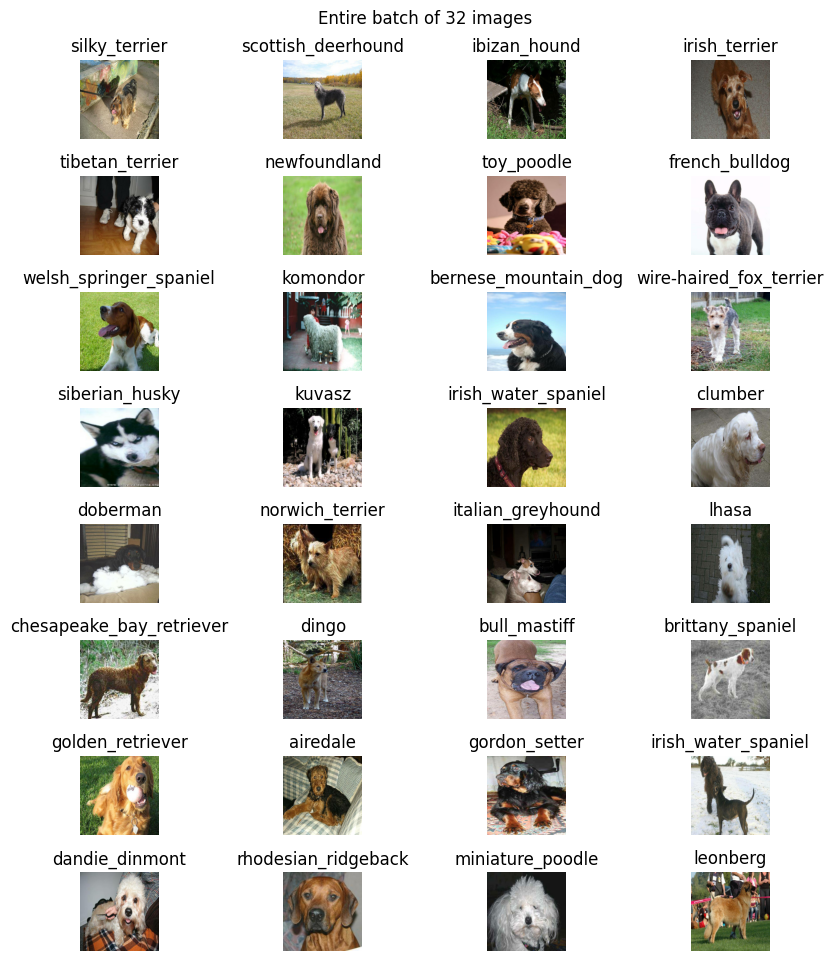

In [29]:
# Let's view our first train batch!
train_images, train_labels = next(train_data.as_numpy_iterator())

show_batch_images(train_images/255, train_labels)

Wow! Look, lively dogs!! 🎉🐶

> **NOTE:** Running the above cell, gives random images because, while ***batch-ifying*** we shuffled the training data!


Now, let's view a batch of validation set!

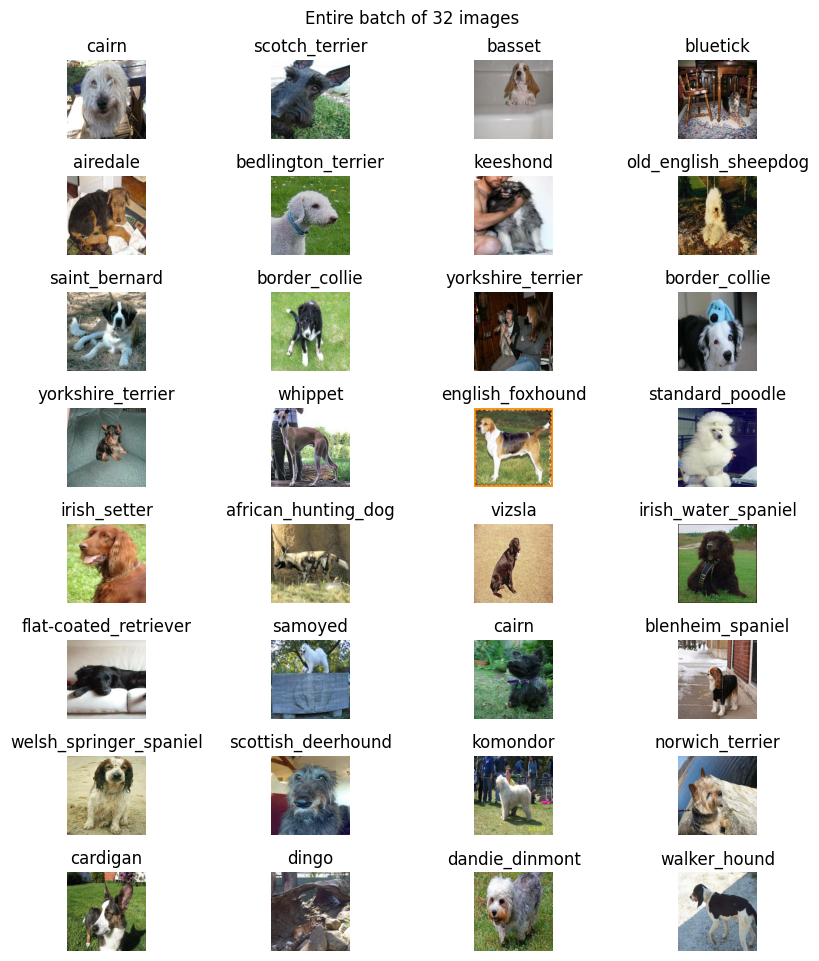

In [30]:
images, labels = next(val_data.as_numpy_iterator())
show_batch_images(images/255, labels)

This images will remain same on re-run cause of no shuffling!!

Beautiful, the data batches are visualized!!

### **Creating and training a model**

Now our data is ready, let's prepare it modelling. We'll use ***an existing model*** from [TensorFlow Hub](https://www.kaggle.com/models?tfhub-redirect=true).

TensorFlow Hub is a resource where you can find **pretrained machine** learning models for the problem you're working on.

Using a pretrained machine learning model is often referred to as **transfer learning**.

---
##### **Why use a pretrained model?**

Building a machine learning model and training it on lots of data from scratch can be **expensive and time consuming.**

Transfer learning helps eliviate some of these by taking what another model has learned and using that information with your own problem.

---
##### **How do we choose a model?**

Since we know our problem is image classification (classifying different dog breeds).

We start by choosing the image problem domain, and then can filter it down by subdomains, in our case, [image classification](https://www.kaggle.com/models?tfhub-redirect=true&task=16686).

Doing this gives a **list of different pretrained models** we can apply to our task.

Clicking on one gives us information about the model as well as instructions for using it.

For example, clicking on the [mobilenet_v2_130_224](https://www.kaggle.com/models/google/mobilenet-v3/TensorFlow2/large-075-224-classification/1) model, tells us this model takes an input of images in the shape **224, 224**. It also says the model has been trained in the domain of image classification.

Let's try it out.
___
##### Building a model

Before we build a model, there are a few things we need to define:
* The input shape (images, in the form of Tensors) to our model.
* The output shape (image labels, in the form of Tensors) of our model.
* The URL of the model we want to use. (If using a pre-trained model!, & we are!)

These things will be standard practice with whatever machine learning model you use. And because we're using TensorFlow, everything will be in the form of Tensors.


In [31]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_breeds) # number of unique labels

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://www.kaggle.com/models/google/mobilenet-v3/TensorFlow2/large-075-224-classification/1" # Version 3

Now we've got the inputs, outputs and model we're using ready to go. We can start to put them together

There are many ways of building a model in TensorFlow but one of the best ways to get started is to [use the Keras API](https://www.tensorflow.org/guide/keras/overview).

> Also, there are many different Deep Learning Architectures used for different domains, based on the specific pre-trained model we choose, the design philosophy of model changes, we should explore many different Great repositories for pre-trained models like [HuggingFace](https://huggingface.co/models), [Kaggle](https://www.kaggle.com/models), [Pytorch](https://pytorch.org/vision/stable/models.html) etc.

Defining a deep learning model in Keras can be as straightforward as saying, "here are the layers of the model, the input shape and the output shape, let's go!"

Where `Keras` is a user-friendly, high level API that makes building models pretty easy.

Knowing this, let's create a function which:
* Takes the input shape, output shape and the model we've chosen's URL as parameters.
* Defines the layers in a Keras model in a sequential fashion (do this first, then this, then that).
* Compiles the model (says how it should be evaluated and improved).
* Builds the model (tells it what kind of input shape it'll be getting).
* Returns the model.

We'll take a look at the code first, then dicuss each part.

In [32]:
# Function to build a Keras model
def build_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL) -> tf.keras.Model:
  print("Building Model with URL:", model_url)

  # Setup the model layers
  model = keras.Sequential([
      tfhub.KerasLayer(model_url), # Layer 1 (input layer, our pre-trained model)
      keras.layers.Dense(units=output_shape, activation="softmax") # Layer 2 (Output layer for breeds probabilities)
  ])

  # Compile the model
  model.compile(
      loss = keras.losses.CategoricalCrossentropy(), # Loss to be reduced
      optimizer = keras.optimizers.Adam(), # Optimizer that tells how to improve!
      metrics = ["accuracy"] # Performance metric to improve
  )

  # Build the model
  model.build(input_shape) # Build with input shape.

  return model

Let's understand it now!!

**As we are using pre-trained model & doing transfer learning to adapt the model for our usecase! Understanding behind the scene architecture of the model is so crucial, if you're interested in it, `read these` [`1`](https://towardsdatascience.com/everything-you-need-to-know-about-mobilenetv3-and-its-comparison-with-previous-versions-a5d5e5a6eeaa), [`2`](https://francescopochetti.com/a-visual-deep-dive-into-the-building-blocks-of-mobilenetv3/).**


##### **Setting up the model layers**

There are two ways to do this in Keras, the [functional](https://www.tensorflow.org/guide/keras/functional) and [sequential API](https://www.tensorflow.org/guide/keras/overview#build_a_simple_model). We've used the sequential.

> **Which one should you use?**

The Keras documentation states the functional API is the way to go for defining complex models but the sequential API (a linear stack of layers) is perfectly fine for getting started, which is what we're doing.

The first layer we use is the model from TensorFlow Hub *(Now on Kaggle)* (`hub.KerasLayer(MODEL_URL))`. So our first layer is actually an **entire model (many more layers)**.

This **input layer** takes in our images and finds patterns in them based on the patterns [`mobilenet_v2_130_224`](https://www.kaggle.com/models/google/mobilenet-v3/TensorFlow2/large-075-224-classification/1) has found.

The next layer (`tf.keras.layers.Dense()`) is the **output layer** of our model. It brings all of the information discovered in the input layer together and outputs it in the shape we're after, **120 (the number of unique labels we have)**.

> Activation Functions adds Non-linearities in our models.

The `activation="softmax"` parameter tells the output layer, we'd like to assign a probability value to each of the 120 labels [somewhere between 0 & 1](https://en.wikipedia.org/wiki/Softmax_function). The higher the value, the more the model believes the input image should have that label. If we were working on a binary classification problem, we'd use `activation="sigmoid"`.

For more on activation functions, See articles [1](https://www.geeksforgeeks.org/activation-functions-neural-networks/), [2](https://towardsdatascience.com/deep-learning-which-loss-and-activation-functions-should-i-use-ac02f1c56aa8).

> #### **Compiling the model**

When compiling a model, you define three key parts:

1. **Loss Function**:
   - The **loss** tells the model how wrong its predictions are compared to the actual values.
   - Think of it as a way to **measure the error** between what the model predicts and what it should predict.

2. **Optimizer**:
   - The optimizer is like a guide that tells the model how to adjust itself (its weights and biases) to make better predictions and reduce the error.

3. **Metrics**:
   - These provide additional insights into how well the model is performing, like accuracy or precision.

Mostly [Adam optimizer](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/) is a great general which performs well on most models. Other optimizers include [RMSprop](https://ruder.io/optimizing-gradient-descent/index.html#rmsprop) and [Stochastic Gradient Descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent).



> #### **Building the model**

We use `model.build()` whenever we're using a layer from TensorFlow Hub to tell our model what input shape it can expect.

In this case, the input shape is `[None, IMG_SIZE, IMG_SIZE, 3]` or `[None, 224, 224, 3]` or `[batch_size, img_height, img_width, color_channels]`.

Batch size is left as `None` as this is inferred from the data we pass the model. In our case, it'll be 32 since that's what we've set up our data batches as.

Now we've gone through each section of the function, let's use it to create a model.

We can call `summary()` on our model to get idea of what our model looks like.

In [33]:
model = build_model()
model.summary()

Building Model with URL: https://www.kaggle.com/models/google/mobilenet-v3/TensorFlow2/large-075-224-classification/1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              4013897   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 4134137 (15.77 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 4013897 (15.31 MB)
_________________________________________________________________


The non-trainable parameters are the patterns learned by `mobilenet_v2_130_224` and the trainable parameters are the ones in the dense layer we added.

This means the main bulk of the information in our model has already been learned and we're going to take that and adapt it to our own problem.